 A Dream Airlines tem o seguinte mapa de rotas para as cidades que atende, onde cada par de cidades tem serviço em ambas as direções entre as cidades:
 
 #ocultado por breviedade

Construa um grafo apropriado que represente esses relacionamentos utilizando o Networkx.

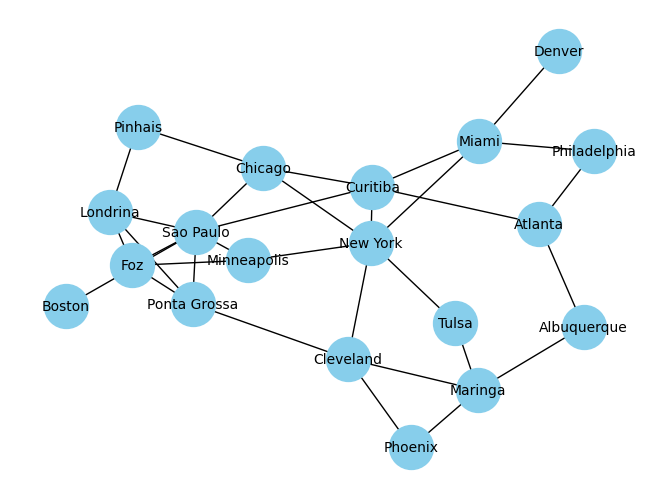

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Lista de nós (cidades)
cities = ["Albuquerque", "Atlanta", "Chicago", "New York", "Pinhais",
          "Curitiba", "Miami", "Sao Paulo", "Londrina", "Foz", "Maringa", "Cleveland",
          "Denver", "Philadelphia", "Minneapolis", "Phoenix", "Ponta Grossa", "Boston",
          "Tulsa"]

# Lista de arestas (conexões entre cidades)
connections = [("Albuquerque", "Atlanta"), ("Chicago", "New York"), ("Chicago", "Pinhais"),
               ("Curitiba", "Atlanta"), ("Curitiba", "Chicago"), ("Curitiba", "Miami"),
               ("Curitiba", "New York"), ("Curitiba", "Sao Paulo"), ("Londrina", "Foz"),
               ("Maringa", "Albuquerque"), ("Maringa", "Cleveland"), ("Miami", "Denver"),
               ("Miami", "New York"), ("Miami", "Philadelphia"), ("Minneapolis", "Foz"),
               ("New York", "Cleveland"), ("New York", "Minneapolis"), ("Philadelphia", "Atlanta"),
               ("Phoenix", "Cleveland"), ("Phoenix", "Maringa"), ("Pinhais", "Londrina"),
               ("Ponta Grossa", "Cleveland"), ("Ponta Grossa", "Foz"), ("Ponta Grossa", "Londrina"),
               ("Sao Paulo", "Boston"), ("Sao Paulo", "Chicago"), ("Sao Paulo", "Foz"),
               ("Sao Paulo", "Londrina"), ("Sao Paulo", "Minneapolis"), ("Sao Paulo", "Ponta Grossa"),
               ("Tulsa", "Maringa"), ("Tulsa", "New York")]

# Criação de um grafo vazio
G = nx.Graph()

# Adiciona os nós e as arestas ao grafo
G.add_nodes_from(cities)
G.add_edges_from(connections)

# Layout da rede usando o "spring_layout" com escala para espaçamento
pos = nx.spring_layout(G, seed=42, scale=2.5)  # Ajuste o valor de escala conforme necessário

# Desenha o grafo com rótulos nos nós
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)


# Exibe o gráfico
plt.show()

2 - Com base na rede construída no exercício 1, faça o que é proposto abaixo.

a) Qual é o número máximo de saltos que um passageiro pode fazer em uma única viagem entre duas cidades atendidas?

b) Qual é o coeficiente de clusterização de Curitiba? E da rede geral?

In [11]:
# O valor máximo de saltos é igual ao diâmetro, que corresponde à distância máxima entre quaisquer pares de nós presentes no grafo.
diameter = nx.diameter(G)  
print(f"O diâmetro do grafo é {diameter} nós de distância")

# O coeficiente de clusterização é definido como a fração de vizinhos que estão interconectados.
clusters = nx.clustering(G)  # Calcula o coeficiente de clusterização para cada nó

# Exibe o coeficiente de clusterização da cidade específica e o coeficiente médio geral
curitiba_clustering = clusters['Curitiba']
average_clustering = nx.average_clustering(G)
print(f"O coeficiente de clusterização de Curitiba é {curitiba_clustering}")
print(f"O coeficiente de clusterização geral é {average_clustering}")

O diâmetro do grafo é 4 nós de distância
O coeficiente de clusterização de Curitiba é 0.3
O coeficiente de clusterização geral é 0.23709273182957394


3- Estenda a rede criada na questão 1.

a) Adicione o atributo nos nós chamado Country, onde o valor se refere ao país onde cada cidade está localizada.

b) Adicione o atributo nas arestas chamado Cost. Se uma arestas representa um voo internacional esse valor deve ser 5, se ela representa um voo nacional o valor deve ser 1.

In [6]:
# Adicionando atributos aos nós
for node in G.nodes:
    # Verificando se o nó pertence a cidades brasileiras
    if node in ["Maringa", "Curitiba", "Londrina", "Foz", "Sao Paulo", "Ponta Grossa", "Pinhais"]:
        G.nodes[node]["Country"] = "Brasil"
    else:
        G.nodes[node]["Country"] = "EUA"

# Adicionando atributos às arestas.
for edge in G.edges:
    # Verificando se os nós conectados pela aresta pertencem ao mesmo país.
    if G.nodes[edge[0]]["Country"] == G.nodes[edge[1]]["Country"]:
        G.edges[edge]["Cost"] = 1  # Voos nacionais têm custo 1
    else:
        G.edges[edge]["Cost"] = 5  # Voos internacionais têm custo 5


4 – Exporte a rede final criada na questão 3 no formato .GML. Confira se todas as informações pedidas anteriormente estão disponíveis nesse arquivo.

In [ ]:
nx.write_gml(G, "finalGraph.gml")